# Import Libraries and Create Directories
-Setup everything to load in our data

In [1]:
#Imports
import math
import pandas as pd
import tensorflow as tf
import numpy as np
from pandas import DataFrame
import pathlib
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Prints version of TensorFlow
print(tf.__version__)



#Create Directories 
data_dir = pathlib.Path("C:/Users/duboi/Desktop/imgdataset/images")

path3 = pathlib.Path("C:/Users/duboi/Desktop/imgdataset")

AUTOTUNE = tf.data.experimental.AUTOTUNE






2.1.0


In [2]:
#Read in CSV file and display first 5 items
df = pd.read_csv("C:/Users/duboi/Desktop/imgdataset/Data_Entry_2017_v2020.csv")
df.head()

,Image_Index,Finding_Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_001.png,Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
3,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168
4,00000001_002.png,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168


In [3]:
#Display features
df.dtypes

Image_Index                     object
Finding_Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
dtype: object

In [4]:
#Prints the amount of images we have downloaded, not training and test images
path, dirs, files = next(os.walk(data_dir))
file_count = len(files)
file_count

4555

In [5]:
##Creates a list dataset (not used in our results)
list_ds = tf.data.Dataset.list_files(str(data_dir/'*.png'))

for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\duboi\\Desktop\\imgdataset\\images\\00000469_000.png'
b'C:\\Users\\duboi\\Desktop\\imgdataset\\images\\00000947_004.png'
b'C:\\Users\\duboi\\Desktop\\imgdataset\\images\\00001197_000.png'
b'C:\\Users\\duboi\\Desktop\\imgdataset\\images\\00000693_005.png'
b'C:\\Users\\duboi\\Desktop\\imgdataset\\images\\00000259_000.png'


# Getting our Data in the Correct Format
- Gets each image into a the correct classfication folder

In [6]:
import shutil
from sklearn import preprocessing

#Creates an array of the Classification names of our data
CLASS_NAMES = np.array([item.name for item in path3.glob('*') if item.name != "trainingdir" and item.name!= "images"
                       and item.name != "Data_Entry_2017_v2020.csv" and item.name!= "valdir"])
CLASS_NAMES

# - Code below cretes An array of Our image names and Labels and separates them
#   from the data_dir into folders of their class names

# # #**************************************************************8
#   file_names = list(df['Image_Index'].values)
#   img_labels = list(df['Finding_Labels'].values)

##Creates folders
#  folders_to_be_created = np.unique(list(CLASS_NAMES))

##Puts them into the directory of our file( needs to be moved into the dataset folder manually)
#  source = os.getcwd()

##Makes a new folder for the Classification name if it is not already there
# for new_path in folders_to_be_created:
#     if not os.path.exists(".//" + new_path):
#         os.makedirs(new_path)
        
# folders = folders_to_be_created.copy()

##Gets Current image and label
# for f in range(len(file_names)):
#     current_img = file_names[f]
#     current_label = img_labels[f]
    
##Moves each image into their correct classification folder
##Since images in csv file are multi-classified, it creates a copy of the image that has multiple labels 
##and puts it into the next classification foldee
#     if os.path.exists(data_dir/current_img):
#         shutil.move(data_dir/current_img, path3/current_label/current_img)
            
#     else:
#         for f in range(len(img_labels)):
#             if img_labels[f] != current_label and os.path.exists(path3/img_labels[f]/current_img):
#                 shutil.copy(path3/img_labels[f]/current_img, path3/current_label/current_img)
        

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [7]:
#Creates the image height, width, batch size, and epoch amount
CLASS = ''
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 5
epochs = 15


# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


#Trains images just as a test to see if the correct images are shown
trainn_data_gen = image_generator.flow_from_directory(directory=str(path3),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(224, 224),
                                                     classes = list(CLASS_NAMES))


Found 640 images belonging to 15 classes.


# Fist Attempt at training Data
-Below are functions we created in our first attempt to load in and train our dataset

In [8]:




# def get_label(file_path):
#     # convert the path to a list of path components
#     parts = tf.strings.split(file_path, os.path.sep)
#     # The second to last is the class-directory
#     #parts[-1] == CLASS
#     return parts[-2] == CLASS_NAMES


# def decode_img(img):
#   # convert the compressed string to a 3D uint8 tensor
#   img = tf.image.decode_jpeg(img, channels=3)
#   # Use `convert_image_dtype` to convert to floats in the [0,1] range.
#   img = tf.image.convert_image_dtype(img, tf.float32)
#   # resize the image to the desired size.
#   return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

# def process_path(file_path):
#   label = get_label(file_path)
#   # load the raw data from the file as a string
#   img = tf.io.read_file(file_path)
#   img = decode_img(img)
#   return img, label


# # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
# labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# for image, label in labeled_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())

In [9]:
# def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
#   # This is a small dataset, only load it once, and keep it in memory.
#   # use `.cache(filename)` to cache preprocessing work for datasets that don't
#   # fit in memory.
#   if cache:
#     if isinstance(cache, str):
#       ds = ds.cache(cache)
#     else:
#       ds = ds.cache()

#   ds = ds.shuffle(buffer_size=shuffle_buffer_size)

#   # Repeat forever
#   ds = ds.repeat()

#   ds = ds.batch(BATCH_SIZE)

#   # `prefetch` lets the dataset fetch batches in the background while the model
#   # is training.
#   ds = ds.prefetch(buffer_size=AUTOTUNE)

#   return ds

In [10]:
#train_ds = prepare_for_training(labeled_ds)


In [11]:
#Create function to see how long it takes to train our data
import time
default_timeit_steps = 1000

def timeit(ds, steps=default_timeit_steps):
  start = time.time()
  it = iter(ds)
  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))

In [12]:
# `keras.preprocessing`
#timeit(train_data_gen)

In [13]:
# `tf.data`
#timeit(train_ds)

In [14]:
#uncached_ds = prepare_for_training(labeled_ds, cache=False)
#timeit(uncached_ds)

In [15]:
# filecache_ds = prepare_for_training(labeled_ds, cache="./xrays.tfcache")
# timeit(filecache_ds)

# Training our data

In [16]:
#Creates directories for our training and validation data
train_dir = os.path.join(path3, 'trainingdir')
validation_dir = os.path.join(path3, 'valdir')

In [17]:
#Creates directories of the first 2 classes in training and validation
#To test if everything is working correctly
train_A_dir = os.path.join(train_dir, CLASS_NAMES[0])  
train_C_dir = os.path.join(train_dir, CLASS_NAMES[1] )  
validation_A_dir = os.path.join(validation_dir, CLASS_NAMES[0])  
validation_C_dir = os.path.join(validation_dir, CLASS_NAMES[1])  

In [18]:
num_A_tr = len(os.listdir(train_A_dir))
num_C_tr = len(os.listdir(train_C_dir))

num_A_val = len(os.listdir(validation_A_dir))
num_C_val = len(os.listdir(validation_C_dir))

# total_train = num_A_tr + num_C_tr
# total_val = num_A_val + num_C_val

print(num_A_tr)
print(num_C_tr)

print(num_A_val)
print(num_C_val)





2
2
1
1


In [19]:
#Creates training and validation image generators to rescale our images
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data



#Trains training data
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 30 images belonging to 15 classes.


In [20]:
#Trains validation data
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 16 images belonging to 15 classes.


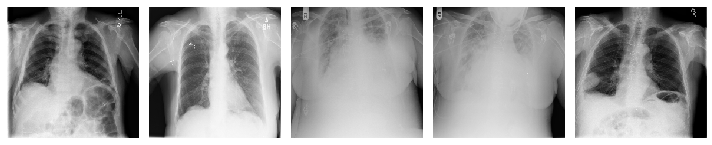

In [21]:
#array of sample images to display
sample_training_images, _ = next(train_data_gen)
##Arrays for training and test images
train_images, train_labels = next(train_data_gen)
test_images, test_labels = next(val_data_gen)

train_images, test_images = train_images / 255.0, test_images / 255.0
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plotImages(sample_training_images[:5])


# Creating our Models

In [22]:
#Cretes our first Model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


#Compiles the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Prints summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [23]:
#fits our model and prints out our accuracy and loss for training and validation data
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=30 // BATCH_SIZE,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=15 // BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 3 steps
Epoch 1/15
6/6 [==============================] - 4s 648ms/step - loss: -701.9972 - accuracy: 0.0667 - val_loss: -4472.5202 - val_accuracy: 0.0667
Epoch 2/15
6/6 [==============================] - 3s 466ms/step - loss: -11032.6437 - accuracy: 0.0667 - val_loss: -32464.7676 - val_accuracy: 0.0667
Epoch 3/15
6/6 [==============================] - 3s 483ms/step - loss: -75102.7897 - accuracy: 0.0667 - val_loss: -154155.3802 - val_accuracy: 0.0667
Epoch 4/15
6/6 [==============================] - 3s 511ms/step - loss: -287059.2344 - accuracy: 0.0667 - val_loss: -568438.5625 - val_accuracy: 0.0667
Epoch 5/15
6/6 [==============================] - 3s 500ms/step - loss: -978894.4271 - accuracy: 0.0667 - val_loss: -1807573.7500 - val_accuracy: 0.0667
Epoch 6/15
6/6 [==============================] - 3s 483ms/step - loss: -2939881.

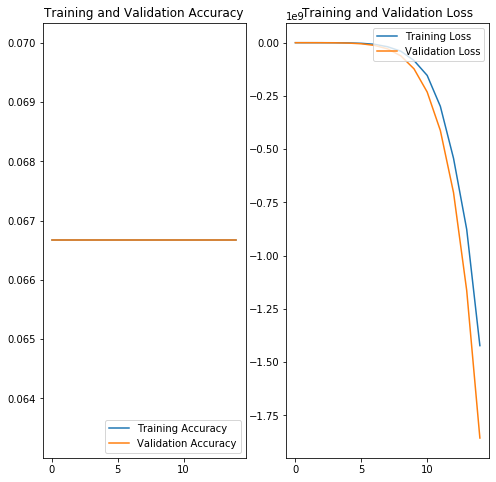

In [24]:
#Creaetes graphs of the training and validaton accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
#Creates our second model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
#Prints summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Adds layers to model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15))

In [28]:
#Prints summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [29]:
#Compiles the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fits model and prints accuracy and loss for our training and validation data
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Train on 5 samples, validate on 5 samples
Epoch 1/20
5/5 [==============================] - 1s 214ms/sample - loss: 2.7080 - accuracy: 0.0000e+00 - val_loss: 2.7032 - val_accuracy: 0.2000
Epoch 2/20
5/5 [==============================] - 0s 94ms/sample - loss: 2.6563 - accuracy: 0.2000 - val_loss: 2.7458 - val_accuracy: 0.2000
Epoch 3/20
5/5 [==============================] - 1s 117ms/sample - loss: 2.4401 - accuracy: 0.2000 - val_loss: 2.9762 - val_accuracy: 0.2000
Epoch 4/20
5/5 [==============================] - 1s 113ms/sample - loss: 2.1291 - accuracy: 0.2000 - val_loss: 3.6877 - val_accuracy: 0.2000
Epoch 5/20
5/5 [==============================] - 1s 117ms/sample - loss: 1.9228 - accuracy: 0.2000 - val_loss: 4.5375 - val_accuracy: 0.2000
Epoch 6/20
5/5 [==============================] - 1s 115ms/sample - loss: 1.8362 - accuracy: 0.4000 - val_loss: 5.1075 - val_accuracy: 0.2000
Epoch 7/20
5/5 [==============================] - 1s 125ms/sample - loss: 1.7115 - accuracy: 0.2000 - v

5/5 - 0s - loss: 5.8877 - accuracy: 0.0000e+00


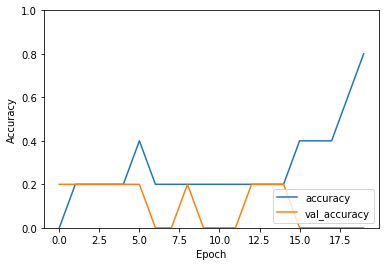

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [31]:
print(test_acc)

0.0
